In [1]:
!conda activate wheat

In [2]:
!pip install opencv-python

In [3]:
!pip install albumentations

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
from glob import glob
from tqdm import tqdm
from random import randint
from IPython.display import clear_output
import ast
import albumentations as A
import hashlib

In [48]:
## Init constant
DATA_DIR = '../../data'
IMG_DIR = f"{DATA_DIR}/train"
SAVE_DIR = f"{DATA_DIR}/rotated"
TARGETS =  ['arvalis_1', 'ethz_1']
locations = ['arvalis_1', 'ethz_1']

BOX_COLOR = [0,0,255]
IMG_SIZE = 1024
JIGSAWS = '../../data/my'

files = os.listdir(JIGSAWS)

In [49]:
def plot_img(img, size=(7,7), is_rgb=False, title=""):
    if isinstance(img, str):
        img = load_img(img)
    plt.figure(figsize=size)
    if is_rgb:
        plt.imshow(img)
    else:
        plt.imshow(img[:,:,::-1])
    plt.suptitle(title)
    plt.show()
    
def plot_imgs(imgs, cols=5, size=7, is_rgb=False, title=""):
    rows = len(imgs)//cols + 1
    fig = plt.figure(figsize=(cols*size, rows*size))
    for i, img in enumerate(imgs):
        if isinstance(img, str):
            img = load_img(img, size=300)
        fig.add_subplot(rows, cols, i+1)
        if is_rgb:
            plt.imshow(img)
        else:
            plt.imshow(img[:,:,::-1])
    plt.suptitle(title)
    plt.show()
    
def visualize_bbox(img, boxes, thickness=3, color=BOX_COLOR):
    img_copy = img.copy()
    for box in boxes:
        img_copy = cv2.rectangle(
            img_copy,
            (int(box[0]), int(box[1])),
            (int(box[2]), int(box[3])),
            color, thickness)
    return img_copy

def load_img(img_id):
    return cv2.imread(f"{IMG_DIR}/{img_id}.jpg")

In [50]:
df = pd.read_csv(f"{DATA_DIR}/train.csv")
df.head()

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1


In [51]:
img_ids = df[df['source'].isin(TARGETS)]['image_id'].unique()
img_ids[:10], len(img_ids)

(array(['44c60402e', '6e3da4ae3', 'd8616bdd1', 'd1effa7a5', 'f121ee695',
        '26d5c0e4a', '818abfa22', 'b5a90214f', '4870004e7', '701c2e3e9'],
       dtype=object),
 1802)

In [39]:
img = cv2.imread(f"{JIGSAWS}/{files[0]}")
img.shape

(4000, 3000, 3)

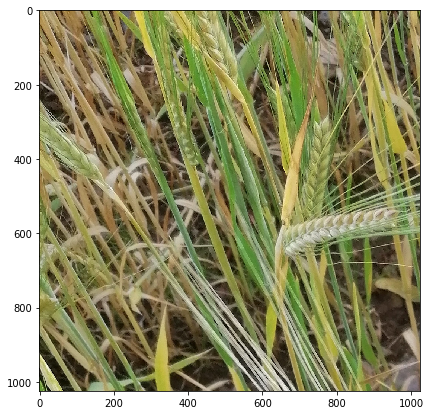

(1024, 1024, 3)

In [40]:
img2 = img[:1024, :1024, :]
plot_img(img2)
img2.shape

In [41]:
files = [file[:-4] for file in files]
files

['IMG_20200723_184821',
 'IMG_20200723_184832',
 'IMG_20200723_184853',
 'IMG_20200723_184915',
 'IMG_20200723_184926',
 'IMG_20200723_184934',
 'IMG_20200723_184938',
 'IMG_20200723_184941',
 'IMG_20200723_184945',
 'IMG_20200723_184957',
 'IMG_20200723_185023',
 'IMG_20200723_185029',
 'IMG_20200723_185038',
 'IMG_20200723_185109',
 'IMG_20200723_185120',
 'IMG_20200723_185126',
 'IMG_20200723_185134',
 'IMG_20200723_185140',
 'IMG_20200723_185152',
 'IMG_20200723_185156',
 'IMG_20200723_185200',
 'IMG_20200723_185203',
 'IMG_20200723_185206',
 'IMG_20200723_185212',
 'IMG_20200723_185216',
 'IMG_20200723_185230',
 'IMG_20200723_185237',
 'IMG_20200723_185242',
 'IMG_20200723_185302',
 'IMG_20200723_185313',
 'IMG_20200723_185323',
 'IMG_20200723_185327',
 'IMG_20200723_185348',
 'IMG_20200723_185352',
 'IMG_20200723_185404',
 'IMG_20200723_185415',
 'IMG_20200723_185420',
 'IMG_20200723_185425',
 'IMG_20200723_185441',
 'IMG_20200723_185452',
 'IMG_20200723_185527',
 'IMG_20200723_1

In [42]:
# generate new image ids
newid = hashlib.md5(f'{file}'.encode()).hexdigest()[:11]
newid

'3b5d2f27cc1'

In [47]:
for file in files:
    print(file)
    newid = hashlib.md5(f'{file}'.encode()).hexdigest()[:13]
    img = cv2.imread(f"{JIGSAWS}/{file}.jpg")
    #aug_image = rotate(image=img)['image'] 
    #aug_image = crop(image=aug_image)['image'] 
    img2 = img[2048:3072, :1024, :]
    cv2.imwrite(f'{SAVE_DIR}/i{newid}.png', img2)

IMG_20200723_184821
IMG_20200723_184832
IMG_20200723_184853
IMG_20200723_184915
IMG_20200723_184926
IMG_20200723_184934
IMG_20200723_184938
IMG_20200723_184941
IMG_20200723_184945
IMG_20200723_184957
IMG_20200723_185023
IMG_20200723_185029
IMG_20200723_185038
IMG_20200723_185109
IMG_20200723_185120
IMG_20200723_185126
IMG_20200723_185134
IMG_20200723_185140
IMG_20200723_185152
IMG_20200723_185156
IMG_20200723_185200
IMG_20200723_185203
IMG_20200723_185206
IMG_20200723_185212
IMG_20200723_185216
IMG_20200723_185230
IMG_20200723_185237
IMG_20200723_185242
IMG_20200723_185302
IMG_20200723_185313
IMG_20200723_185323
IMG_20200723_185327
IMG_20200723_185348
IMG_20200723_185352
IMG_20200723_185404
IMG_20200723_185415
IMG_20200723_185420
IMG_20200723_185425
IMG_20200723_185441
IMG_20200723_185452
IMG_20200723_185527
IMG_20200723_185548
IMG_20200723_185600
IMG_20200723_185601
IMG_20200723_185712
IMG_20200723_185733
IMG_20200723_185741
IMG_20200723_185745
IMG_20200723_185755
IMG_20200723_185800


In [9]:
#rotate = A.Rotate((44,45), border_mode=0, always_apply=True, p=1)
resize = A.Resize(height=IMG_SIZE, width=IMG_SIZE, p=1.0)
crop = A.CenterCrop(1024, 1024, always_apply=True, p=1.0)

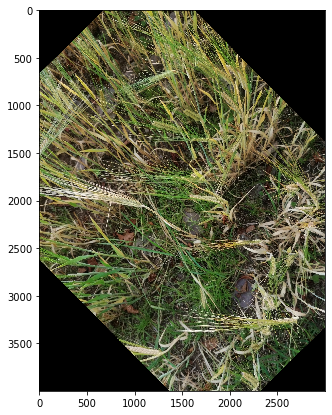

In [10]:
aug_image = rotate(image=img)['image']  
plot_img(aug_image)

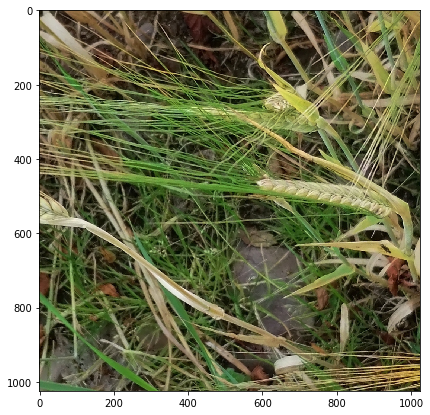

In [11]:
aug_image = crop(image=aug_image)['image']  
plot_img(aug_image)

In [52]:
for img_id in img_ids[:1000]:
    print(img_id)
    img = cv2.imread(f"{IMG_DIR}/{img_id}.jpg")
    aug_image = rotate(image=img)['image'] 
    cv2.imwrite(f'{SAVE_DIR}/r{img_id}.png', aug_image)

44c60402e
6e3da4ae3
d8616bdd1
d1effa7a5
f121ee695
26d5c0e4a
818abfa22
b5a90214f
4870004e7
701c2e3e9
1d7d9fda3
8549afcd5
c233d242d
f6181ac93
c8909d7a1
7a77062fb
34c5e70d5
00ea5e5ee
144d57df8
8b2f86ea1
4759e7258
69913c545
c9b23ec87
25d38ec2c
1b10b9fa1
d05a25a35
f43b1b260
86a279fe3
80d3bc82b
21504c374
2f2716b45
2dfd889a2
498261a4b
14d2b1c3a
4021d47d4
348f3c34b
0b5b60131
e9ebaec07
844d5bd76
7cb9748c4
74aa7fe9d
de941b2fc
11f24467f
6231cf54f
06812a4fc
bad015d3b
69c5b6df3
8bc56fb34
0980aa079
aa7eba834
b2de96e22
53d0a8b5a
d64fc42f7
5df7b74dd
8a3f6d1fe
7be932521
4a609f334
31b58b813
602e4b162
12b724773
7c5221c68
4789e5c97
8083f65f2
2d9f247fb
744856d95
93abe3225
809d816dd
1dbd065ce
d3b3b5628
d1d96eae9
a700357af
4762899a8
a7c24c3a8
9d8a3a164
1fe63a46a
c07795af6
24dda66d6
2dbaac896
546a0e9fc
d7612c04a
eb3cffc94
84d4ca3d3
70cfaefe9
2041a2d49
ab026459d
2fc0fadfa
2d159a876
1f9a8abcd
8a7d9b4b0
fe0d6c114
aa10c1bab
b1341e5ff
1908103f1
8841bcb77
aeb9f155b
5cda6a08c
b6a159fd4
19fd72f8b
b95fd89e3
a4ac9094c


63c658201
2ae9c276f
bb2076d4c
e6af2a27e
4341d37a9
da5063a1b
8d2b5b90e
1a106f404
044097f45
990188afc
2c3d40735
7347e16e8
35d6a4509
f059e0c19
0f5267442
69d37b0ba
966c3ebc6
82775d15c
6d1c9f629
838e29709
56ace8298
1964e90f0
2bc10136f
a7436f5c7
d5814b3c4
2643476a0
3dd22103f
45402cfbb
f24ebcdef
4b04d64f9
03cae970d
6d34eb3b2
03ad2a35c
ed88cccdc
6298999e6
3d39ed7cf
27bf608b8
eb56a281b
be6c72a2c
fde56a455
764c88483
b24a3ecee
f98dd1c09
c5d1a8143
8fb545c05
7538c9a97
e55ddec1a
a6989b72e
d50c71d8c
5d6d64e39
ef156f858
3a4672486
5f3d068f1
5792ad7e6
8ad93457c
2f53b1a20
348059f04
87c6acaae
df0be3f16
c52f29668
078d5b8b9
a3cf26f70
e4ba46588
f4c7f63e6
61ff5cdc2
b6324ea82
5a5fff341
3e9bf50b6
fc8cf268b
fbecfeba8
ff1716939
2cc49e1ba
1ff3f11c4
b0833ce3d
768a74e08
8a5310dc4
1708360c3
5ccb447e6
0b9624bd4
666ca30b3
c6454073b
4af27998f
f6d969b95
e1cff2554
0923194d6
e4b7e3af6
8f06b77e5
6f10a6f8f
a13c89a7f
2051f1446
38dc44b85
64b352e9a
5ab074c28
90677210d
efc5642bb
4e652f7f1
aa29cef4a
8b12ac747
9ebdbabff
f5837f263


In [96]:
for img_id in files:
    print(img_id)
    img = cv2.imread(f"{JIGSAWS}/{img_id }")
    aug_image = rotate(image=img)['image'] 
    aug_image = crop(image=aug_image)['image'] 
    cv2.imwrite(f'{SAVE_DIR}/j{img_id}.png', aug_image)

06263692e6.jpg
066dad5b68.jpg
0a48849842.jpg
0d62cee82d.jpg
134bdcd3c9.jpg
16aec47717.jpg
1cb50ff6dc.jpg
1e425ffd33.jpg
2484b01fa9.jpg
26c61337d5.jpg
2741036a50.jpg
2e7250e7d4.jpg
2ed015a919.jpg
32c0dc1910.jpg
3ce12f3c5e.jpg
3f95ca3037.jpg
489b2ad548.jpg
4dd5bfb78c.jpg
4f4d952e50.jpg
4fb23675b1.jpg
5909bac4e6.jpg
622ab475f0.jpg
6608ec3658.jpg
6bb6c940c5.jpg
6ded75846f.jpg
8171a416c7.jpg
8190f191b4.jpg
8a9fc697ef.jpg
987116bb03.jpg
9894802e12.jpg
a951bb42d7.jpg
ae0f709a3a.jpg
b8cacfe067.jpg
bd3679e05b.jpg
c16658e89e.jpg
cfd152a367.jpg
d4c98a59a9.jpg
d865298c60.jpg
dbf3d80771.jpg
dd1ded8b57.jpg
ebd3027cc7.jpg
